# Python 機器學習從零至一 

> 數值預測的任務

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from pyvizml import NormalEquation
from pyvizml import GradientDescent
from pyvizml import AdaGrad

## 關於數值預測的任務

## 數值預測的任務：迴歸模型

- 「數值預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於連續型數值變數。
- 更常被稱為「迴歸模型」。

## 預測 NBA 球員的體重

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的體重。
- 評估（Performance）：模型預測的體重與球員實際體重的誤差大小。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤差應該要減少。

In [2]:
# players_stats 資料中的 weightKilograms
csv_url = "https://raw.githubusercontent.com/yaojenkuo/ml-newbies/master/player_stats.csv"
player_stats = pd.read_csv(csv_url)
y = player_stats["weightKilograms"].values
y.dtype

dtype('float64')

## 該如何預測 NBA 球員的體重

- 隨意猜測的黑猩猩模型。
- 基於規則（Rule-based）的專家模型。
- 基於最小化損失函數的機器學習模型。
- ...等。

## 隨意猜測的黑猩猩模型

在 NBA 球員體重全距之間取隨機整數。

In [3]:
y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_max, y_min = y.max(), y.min()
y_hat = np.random.randint(low=y_min, high=y_max, size=y_valid.size)

## 評估隨意猜測的黑猩猩模型：均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [4]:
mse_chimp = np.sum((y_valid - y_hat)**2) / y_valid.size
mse_chimp

620.8468674698794

## 基於規則的專家模型

根據 NBA 球員的鋒衛位置取其平均體重。

In [5]:
mean_weight_by_pos = player_stats.groupby("pos")["weightKilograms"].mean()
mean_weight = player_stats["pos"].map(mean_weight_by_pos).values
mean_weight_train, y_hat = train_test_split(mean_weight, test_size=0.33, random_state=42)

## 評估基於規則的專家模型：均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [6]:
mse_expert = np.sum((y_valid - y_hat)**2) / y_valid.size
mse_expert

50.668004006804765

## 基於最小化損失函數的機器學習模型

將 `heightMeters` 當作特徵矩陣 $x_i$ 作為體重的預測依據。

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2} = \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - x_i^{(train)} w)^2}
\end{equation}

In [7]:
X = player_stats["heightMeters"].values.reshape(-1, 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
h = LinearRegression()
h.fit(X_train, y_train)
y_hat = h.predict(X_valid)

## 評估基於最小化損失函數的機器學習模型：均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [8]:
mse_ml = np.sum((y_valid - y_hat)**2) / y_valid.size
mse_ml

62.807098266825335

## 該如何預測 NBA 球員的體重：考量哪個模型的均方誤差最小

1. 專家模型。
2. 機器學習模型。
3. 黑猩猩模型。

## 如何決定 `X_train` 與 `y_train` 之間的關聯 $w$

- Scikit-Learn 預測器的關鍵：`fit()` 方法。
- 正規方程（Normal equation）。
- 梯度遞減（Gradient descent）。

## 正規方程

## 使用基於最小化損失函數的機器學習模型解決數值預測的任務

創造一個 $h$ 函數可以將無標籤資料 $x$ 作為輸入，以係數 $w$ 相乘後輸出 $\hat{y}$

\begin{equation}
\hat{y} = h(x; w) = w_0 + w_1x_1 + ... + w_nx_n
\end{equation}

## 寫作成向量矩陣相乘形式，為 $w_0$ 補上 $x_0=1$

\begin{align}
\hat{y} &= w_0x_0 + w_1x_1 + ... + w_nx_n, \; where \; x_0 = 1 \\
&= w^Tx
\end{align}

## 向量矩陣相乘形式

- $m + 1$ 為觀測值列數。
- $n + 1$ 是特徵個數。

\begin{equation}
\hat{y} = h(X; w) = 
\begin{bmatrix} x_{00}, x_{01}, ..., x_{0n} \\ x_{10}, x_{11}, ..., x_{1n} \\.\\.\\.\\ x_{m0}, x_{m1}, ..., x_{mn}
\end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \\.\\.\\.\\ w_n \end{bmatrix} = Xw
\end{equation}

## $h(X; w)$ 是基於 $w$ 的函數

- 如果第 $i$ 個特徵 $x_i$ 對應的係數 $w_i$ 為正數，該特徵與 $\hat{y}$ 的變動同向。
- 如果第 $i$ 個特徵 $x_i$ 對應的係數 $w_i$ 為負數，該特徵與 $\hat{y}$ 的變動反向。
- 如果第 $i$ 個特徵 $x_i$ 對應的係數 $w_i$ 為零，該特徵對 $\hat{y}$ 的變動沒有影響。

## 資料與任務已經被定義妥善

- 特徵矩陣 $X$
- 目標向量 $y$
- 係數向量 $w$
- 任務：將 $X$ 輸入 $h$ 來預測 $\hat{y}$

## 定義評估

評估 $h$ 的方法是計算 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 之間的均方誤差（Mean squared error）。

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2}
\end{equation}

## 寫為向量運算的外觀

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m} \parallel {y^{(train)}_i - X^{(train)}w \parallel^2}
\end{equation}

## 將均方誤差表達為一個基於係數向量 $w$ 的損失函數 $J(w)$

\begin{equation}
J(w) = \frac{1}{m} \parallel {y^{(train)}_i - X^{(train)}w \parallel^2}
\end{equation}

## 整理一下 $J(w)$ 的外觀

為了書寫方便，我們省略訓練資料的註記$(train)$。

\begin{align}
J(w) &= \frac{1}{m}(Xw - y)^T(Xw - y) \\
&= \frac{1}{m}(w^TX^T - y^T)(Xw - y) \\
&= \frac{1}{m}(w^TX^TXw - w^TX^Ty - y^TXw + y^Ty) \\
&= \frac{1}{m}(w^TX^TXw - (Xw)^Ty - y^TXw + y^Ty) \\
&= \frac{1}{m}(w^TX^TXw - 2(Xw)^Ty + y^Ty)
\end{align}

## 求解 $J(w)$ 斜率為零的位置 $w^*$

\begin{gather}
\frac{\partial}{\partial w} J(w) = 0 \\
2X^TXw - 2X^Ty = 0 \\
X^TXw = X^Ty \\
w^* = (X^TX)^{-1}X^Ty
\end{gather}

## $w^*$ 求解稱為「正規方程」

\begin{equation}
w^* = (X^{(train)T}X^{(train)})^{-1}X^{(train)T}y^{(train)}
\end{equation}

## 自行定義正規方程類別 NormalEquation

```python
class NormalEquation:
    """
    This class defines the Normal equation for linear regression.
    Args:
        fit_intercept (bool): Whether to add intercept for this model.
    """
    def __init__(self, fit_intercept=True):
        self._fit_intercept = fit_intercept
```

```python
    def fit(self, X_train, y_train):
        """
        This function uses Normal equation to solve for weights of this model.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        m = self._X_train.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        X_train_T = np.transpose(self._X_train)
        left_matrix = np.dot(X_train_T, self._X_train)
        right_matrix = np.dot(X_train_T, self._y_train)
        left_matrix_inv = np.linalg.inv(left_matrix)
        w = np.dot(left_matrix_inv, right_matrix)
        w_ravel = w.ravel().copy()
        self._w = w
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:]
```

```python
    def predict(self, X_test):
        """
        This function returns predicted values with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        self._X_test = X_test.copy()
        m = self._X_test.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_test = np.concatenate([X0, self._X_test], axis=1)
        y_pred = np.dot(self._X_test, self._w)
        return y_pred
```

In [9]:
h_sklearn = LinearRegression()
h_sklearn.fit(X_train, y_train)
h_ne = NormalEquation()
h_ne.fit(X_train, y_train)

In [10]:
print(h_sklearn.intercept_) # 截距項
print(h_sklearn.coef_)      # 係數項
print(h_ne.intercept_)      # 截距項
print(h_ne.coef_)           # 係數項

-95.14864145823769
[97.25416437]
-95.1486414580504
[97.25416437]


In [11]:
# 預測
y_hat = h_sklearn.predict(X_valid)
y_hat[:5]

array([ 95.46952071,  95.46952071,  92.55189578, 107.14002044,
        97.414604  ])

In [12]:
# 預測
y_hat = h_ne.predict(X_valid)
y_hat[:5]

array([ 95.46952071,  95.46952071,  92.55189578, 107.14002044,
        97.414604  ])

## 梯度遞減

## 另外一種生成係數向量 $w$ 的演算方法

- 在機器學習、深度學習中更為廣泛使用的演算方法稱為「梯度遞減」（Gradient descent）。
- 基本概念是先隨機初始化一組係數向量，以迭代更新該組係數向量，一直到 $J(w)$ 收斂到局部最小值為止。

## 為什麼採用梯度遞減

- 正規方程中必須要透過計算 $X^TX$ 的反矩陣 $(X^TX)^{-1}$ 求解 $w^*$
- `(n, n)` 反矩陣的計算複雜性最高是 $O(n^3)$，這意味著如果特徵個數變為 2 倍，計算 $(X^TX)^{-1}$ 的時間最多會變為 8 倍。
- 當特徵矩陣 `n` 很大（約莫是大於 $10^4$），正規方程的計算複雜性問題就會浮現，例如低解析度 $100 \: px \times 100 \: px$ 的灰階圖片。

## 梯度遞減如何「有方向性地」更新係數向量

- 梯度遞減並不是盲目亂槍打鳥地更新係數向量。
- 依據損失函數 $J(w)$ 關於係數向量 $w$ 的偏微分來決定更新的方向性。
- 更新幅度則由一個大於零、稱為「學習速率」的常數 $\alpha$ 決定。

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

In [13]:
X0 = np.ones((10, 1))
X1 = np.arange(1, 11).reshape(-1, 1)
w = np.array([5, 6])
X_train = np.concatenate([X0, X1], axis=1)
y_train = np.dot(X_train, w)
print(X_train)
print(y_train)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[11. 17. 23. 29. 35. 41. 47. 53. 59. 65.]


## 從後見之明的視角來看

我們知道係數向量 $w^*$ 的組成 $w_0=5$、$w_1=6$

\begin{equation}
f(x) = y = 5x_0 + 6x_1 \\
w^* = \begin{bmatrix} w_0^* \\ w_1^* \end{bmatrix} = \begin{bmatrix} 5 \\ 6 \end{bmatrix}
\end{equation}

## 大海撈針的問題

- 給定電腦程式一組 $X^{(train)}$ 與 $y^{(train)}$
- 有無限多組的 $w$ 等著要嘗試。
- 「梯度遞減」演算方法就是為電腦程式提供了一個尋找解題的方式。

## 首先隨機初始化一組 $w$

In [14]:
np.random.seed(42)
w = np.random.rand(2)
w

array([0.37454012, 0.95071431])

## 針對這組 $w$ 可以得到一組 $\hat{y}^{(train)}$

In [15]:
y_hat = np.dot(X_train, w)
y_hat

array([1.32525443, 2.27596873, 3.22668304, 4.17739734, 5.12811165,
       6.07882596, 7.02954026, 7.98025457, 8.93096888, 9.88168318])

## 針對這組 $\hat{y}^{(train)}$ 可以計算與 $y^{(train)}$ 的均方誤差

In [16]:
m = y_train.size
j = ((y_hat - y_train).T.dot(y_hat - y_train)) / m
j

1259.87134315462

## 下一次的該如何更新 $w$ 才能確保離 $w^*$ 更近，讓計算出來的均方誤差會更小一些

## 梯度遞減演算方法

將目前的 $w_0$ 減去學習速率 $\alpha$ 乘上 $J(w)$ 關於 $w_0$ 的偏微分、將目前的 $w_1$ 減去學習速率 $\alpha$ 乘上 $J(w)$ 關於 $w_1$ 的偏微分。

\begin{equation}
w_0 := w_0 - \alpha \frac{\partial J}{\partial w_0}
\end{equation}

\begin{equation}
w_1 := w_1 - \alpha \frac{\partial J}{\partial w_1}
\end{equation}

## 以係數向量的外觀表示

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

## 將 $J(w)$ 關於 $w$ 的偏微分式子展開

\begin{align}
\frac{\partial J}{\partial w} &= \frac{1}{m}\frac{\partial}{\partial w}(\parallel y - Xw \parallel^2) \\
&= \frac{1}{m}\frac{\partial}{\partial w}(Xw - y)^T(Xw-y) \\
&= \frac{1}{m}\frac{\partial}{\partial w}(w^TX^TXw - w^TX^Ty - y^TXw + y^Ty) \\
&= \frac{1}{m}\frac{\partial}{\partial w}(w^TX^TXw - (Xw)^Ty - (Xw)^Ty + y^Ty) \\
&= \frac{1}{m}\frac{\partial}{\partial w}(w^TX^TXw - 2(Xw)^Ty + y^Ty) \\
&= \frac{1}{m}(2X^TXw - 2X^Ty) \\
&= \frac{2}{m}(X^TXw - X^Ty) \\
&= \frac{2}{m}X^T(Xw - y) \\
&= \frac{2}{m}X^T(\hat{y} - y)
\end{align}

## $J(w)$ 關於 $w$ 的偏微分就是演算方法中所謂的「梯度」（Gradient）

在迭代過程中 $w$ 更新的方向性取決於梯度正負號，如果梯度為正，$w$ 會向左更新（減小）；如果梯度為負，$w$ 會向右更新（增大）。

\begin{equation}
w := w - \alpha \frac{2}{m}X^T(\hat{y}^{(train)} - y^{(train)})
\end{equation}

## 計算隨機初始化的 $w$ 其梯度為何

In [17]:
gradients = (2/m) * np.dot(X_train.T, y_hat - y_train)
gradients

array([ -64.79306239, -439.6750571 ])

## 當梯度為負，隨機初始化的 $w$ 會向右更新（增大）

離後見之明視角所知的 $w_0 = 5$、$w_1 = 6$ 更加接近，在更新的方向性上是正確的，假設將學習速率設定為 0.001。

In [18]:
learning_rate = 0.001
-learning_rate * gradients

array([0.06479306, 0.43967506])

## 經過第一次迭代更新後的 $w$

In [19]:
w -= learning_rate * gradients
w

array([0.43933318, 1.39038936])

## 針對更新過一次的 $w$ 可以得到一組 $\hat{y}^{(train)}$

In [20]:
y_hat = np.dot(X_train, w)
y_hat

array([ 1.82972254,  3.22011191,  4.61050127,  6.00089064,  7.39128   ,
        8.78166936, 10.17205873, 11.56244809, 12.95283745, 14.34322682])

## 更新過一次的 $w$ 所對應的均方誤差

In [21]:
j = ((y_hat - y_train).T.dot(y_hat - y_train)) / m
j

1070.1192063534622

## 觀察運用「梯度遞減」演算方法

- 透過計算損失函數關於係數向量的梯度決定更新的**方向性**。
- 透過學習速率決定更新的**幅度**。
- 在迭代進行一次之後，係數向右更新（增大）離的 $w^*$ 更接近了些、均方誤差也下降了些。

## 自行定義梯度遞減類別 GradientDescent

```python
class GradientDescent:
    """
    This class defines the vanilla gradient descent algorithm for linear regression.
    Args:
        fit_intercept (bool): Whether to add intercept for this model.
    """
    def __init__(self, fit_intercept=True):
        self._fit_intercept = fit_intercept
```

```python
    def find_gradient(self):
        """
        This function returns the gradient given certain model weights.
        """
        y_hat = np.dot(self._X_train, self._w)
        gradient = (2/self._m) * np.dot(self._X_train.T, y_hat - self._y_train)
        return gradient
    def mean_squared_error(self):
        """
        This function returns the mean squared error given certain model weights.
        """
        y_hat = np.dot(self._X_train, self._w)
        mse = ((y_hat - self._y_train).T.dot(y_hat - self._y_train)) / self._m
        return mse
```

```python
    def fit(self, X_train, y_train, epochs=10000, learning_rate=0.001):
        """
        This function uses vanilla gradient descent to solve for weights of this model.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        self._m = self._X_train.shape[0]
        if self._fit_intercept:
            X0 = np.ones((self._m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        n = self._X_train.shape[1]
        self._w = np.random.rand(n)
        n_prints = 10
        print_iter = epochs // n_prints
        w_history = dict()
        for i in range(epochs):
            current_w = self._w.copy()
            w_history[i] = current_w
            mse = self.mean_squared_error()
            gradient = self.find_gradient()
            if i % print_iter == 0:
                print("epoch: {:6} - loss: {:.6f}".format(i, mse))
            self._w -= learning_rate*gradient
        w_ravel = self._w.copy().ravel()
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:]
        self._w_history = w_history
```

```python
    def predict(self, X_test):
        """
        This function returns predicted values with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        self._X_test = X_test
        m = self._X_test.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_test = np.concatenate([X0, self._X_test], axis=1)
        y_pred = np.dot(self._X_test, self._w)
        return y_pred
```

In [22]:
h = GradientDescent(fit_intercept=False)
h.fit(X_train, y_train, epochs=20000, learning_rate=0.001)

epoch:      0 - loss: 1395.016289
epoch:   2000 - loss: 0.467521
epoch:   4000 - loss: 0.087119
epoch:   6000 - loss: 0.016234
epoch:   8000 - loss: 0.003025
epoch:  10000 - loss: 0.000564
epoch:  12000 - loss: 0.000105
epoch:  14000 - loss: 0.000020
epoch:  16000 - loss: 0.000004
epoch:  18000 - loss: 0.000001


In [23]:
print(h.intercept_) # 截距項
print(h.coef_)      # 係數項

4.9992312515155835
[6.00011042]


## 將自行定義的梯度遞減預測器類別應用在真實資料

In [24]:
X = player_stats['heightMeters'].values.reshape(-1, 1)
y = player_stats['weightKilograms'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
h = GradientDescent()
h.fit(X_train, y_train, epochs=300000, learning_rate=0.01)

epoch:      0 - loss: 9663.251327
epoch:  30000 - loss: 52.994610
epoch:  60000 - loss: 49.515601
epoch:  90000 - loss: 48.904315
epoch: 120000 - loss: 48.796909
epoch: 150000 - loss: 48.778036
epoch: 180000 - loss: 48.774720
epoch: 210000 - loss: 48.774138
epoch: 240000 - loss: 48.774035
epoch: 270000 - loss: 48.774017


In [25]:
print(h.intercept_) # 截距項
print(h.coef_)      # 係數項

-95.12937403313329
[97.2444856]


In [26]:
# 預測
y_hat = h.predict(X_valid)
y_hat[:5]

array([ 95.46981774,  95.46981774,  92.55248317, 107.13915601,
        97.41470745])

## 標準化與進階的梯度遞減

## 回顧梯度遞減的核心概念

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

- $w$ 的更新依據有兩個：學習速率 $\alpha$ 與梯度 $\frac{\partial J}{\partial w}$
- 學習速率使用一個事先決定的常數。

## 不效率的最適化

- 使用固定的學習速率。
- 只考慮單下的梯度。
- 像是用同一套裝備與配速去面對距離不同的路跑賽事。

## 以 [Kaggle](https://www.kaggle.com/) 網站所下載回來的[艾姆斯房價](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)資料為例

In [27]:
# 以其中的 `GrLivArea` 作為特徵矩陣來預測目標向量 `SalePrice`
train = pd.read_csv("data/house-prices/train.csv")
X = train['GrLivArea'].values.reshape(-1, 1)
y = train['SalePrice'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

30774.037736162078
[98.50395317]


## 使用自行定義的 `GradientDescent` 類別，會發現不論怎麼調整學習速率、增加訓練的迭代次數，$w$ 都離理想值距離甚遠

In [28]:
h = GradientDescent()
h.fit(X_train, y_train, epochs=500000, learning_rate=1e-7) # 無法使用更大的學習速率，誤差會高到發生溢位

epoch:      0 - loss: 38051606006.512634
epoch:  50000 - loss: 3240902379.450190
epoch: 100000 - loss: 3240693358.485150
epoch: 150000 - loss: 3240484776.905393
epoch: 200000 - loss: 3240276633.787285
epoch: 250000 - loss: 3240068928.209129
epoch: 300000 - loss: 3239861659.251170
epoch: 350000 - loss: 3239654825.995579
epoch: 400000 - loss: 3239448427.526465
epoch: 450000 - loss: 3239242462.929857


In [29]:
print(h.intercept_)
print(h.coef_)

322.21983727161654
[116.36489226]


In [30]:
def plot_contour(X_train, y_train, w_history, w_0_min, w_0_max, w_1_min, w_1_max, w_0_star, w_1_star):
    m = X_train.shape[0]
    X0 = np.ones((m, 1), dtype=float)
    X_train = np.concatenate([X0, X_train], axis=1)
    resolution = 100
    W_0, W_1 = np.meshgrid(np.linspace(w_0_min, w_0_max, resolution), np.linspace(w_1_min, w_1_max, resolution))
    Z = np.zeros((resolution, resolution))
    for i in range(resolution):
        for j in range(resolution):
            w = np.array([W_0[i, j], W_1[i, j]])
            y_hat = np.dot(X_train, w)
            mse = ((y_hat - y_train).T.dot(y_hat - y_train)) / m
            Z[i, j] = mse
    epochs = len(w_history)
    w_0_history = []
    w_1_history = []
    for i in range(epochs):
        w_0_history.append(w_history[i][0])
        w_1_history.append(w_history[i][1])
    fig, ax = plt.subplots()
    CS = ax.contour(W_0, W_1, Z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.plot(w_0_history, w_1_history, "-", color="blue")
    ax.scatter(w_0_star, w_1_star, marker="*", color="red")
    ax.set_xlabel("$w_0$")
    ax.set_ylabel("$w_1$", rotation=0)
    plt.show()

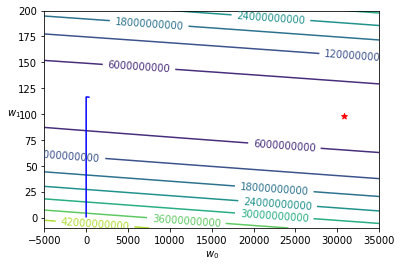

In [31]:
w_history = h._w_history
plot_contour(X_train, y_train, w_history, -5000, 35000, -10, 200, lr.intercept_, lr.coef_[0])

## 搭配兩種技法來增加效率

1. 特徵矩陣的標準化。
2. 進階的梯度遞減演算方法。

## 特徵矩陣的標準化：最小最大標準化（Min-max scaler）

標準化後得到的 $w^{(scaled)}$ 要再記得實施「逆」轉換。

\begin{align}
\hat{y} &= X^{(scaled)} w^{(scaled)} \\
&= w_0^{(scaled)}x_0 + \sum_i w_i^{(scaled)} x_i^{(scaled)} \\
&= w_0^{(scaled)} + \sum_i w_i^{(scaled)} \frac{x_i - x_i^{(min)}}{x_i^{(max)} - x_i^{(min)}}
\end{align}

\begin{align}
w_0 &= w_0^{(scaled)} - \sum_{i=1} w_i^{(scaled)} \frac{x_i^{(min)}}{x_i^{(max)} - x_i^{(min)}} \\
w_i &= \sum_{i=1} \frac{w_i^{(scaled)}}{x_i^{(max)} - x_i^{(min)}}
\end{align}

In [32]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
y = train['SalePrice'].values
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_) # 截距項
print(lr.coef_)      # 係數項

63674.358095820746
[522858.98344032]


In [33]:
h = GradientDescent()
h.fit(X_train, y_train, epochs=100000, learning_rate=0.01)
print(h.intercept_) # 截距項
print(h.coef_)      # 係數項

epoch:      0 - loss: 38574561936.864601
epoch:  10000 - loss: 3197795837.637498
epoch:  20000 - loss: 3142864604.714557
epoch:  30000 - loss: 3141503145.580052
epoch:  40000 - loss: 3141469402.099771
epoch:  50000 - loss: 3141468565.774660
epoch:  60000 - loss: 3141468545.046516
epoch:  70000 - loss: 3141468544.532774
epoch:  80000 - loss: 3141468544.520041
epoch:  90000 - loss: 3141468544.519726
63674.3591206031
[522858.97891743]


## 依照「逆」標準化回推 $w$

In [34]:
intercept_rescaled = h.intercept_ - (h.coef_ * mms.data_min_ / mms.data_range_)
coef_rescaled = h.coef_ / mms.data_range_
print(intercept_rescaled) # 截距項
print(coef_rescaled)      # 係數項

[30774.03904554]
[98.50395232]


## 特徵矩陣的標準化：常態標準化（Standard scaler）

標準化後得到的 $w^{(scaled)}$ 要再記得實施「逆」轉換。

\begin{align}
\hat{y} &= X^{(scaled)} w^{(scaled)} \\
&= w_0^{(scaled)}x_0 + \sum_i w_i^{(scaled)} x_i^{(scaled)} \\
&= w_0^{(scaled)} + \sum_i w_i^{(scaled)} \frac{x_i - \mu_{x_i}}{\sigma_{x_i}}
\end{align}

\begin{align}
w_0 &= w_0^{(scaled)} - \sum_{i=1} w_i^{(scaled)} \frac{\mu_{x_i}}{\sigma_{x_i}} \\
w_i &= \sum_{i=1} \frac{w_i^{(scaled)}}{\sigma_{x_i}}
\end{align}

In [35]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_) # 截距項
print(lr.coef_)      # 係數項

180053.20294084703
[51744.16536903]


In [36]:
h = GradientDescent()
h.fit(X_train, y_train, epochs=10000, learning_rate=0.001)
print(h.intercept_) # 截距項
print(h.coef_)      # 係數項

epoch:      0 - loss: 38574730599.218040
epoch:   1000 - loss: 3763987629.644883
epoch:   2000 - loss: 3152443788.694848
epoch:   3000 - loss: 3141662791.806108
epoch:   4000 - loss: 3141471997.043127
epoch:   5000 - loss: 3141468606.167773
epoch:   6000 - loss: 3141468545.625978
epoch:   7000 - loss: 3141468544.539675
epoch:   8000 - loss: 3141468544.520079
epoch:   9000 - loss: 3141468544.519723
180053.2025929845
[51744.16539333]


## 依照「逆」標準化回推 $w$

In [37]:
intercept_rescaled = h.intercept_ - h.coef_ * ss.mean_ / ss.scale_
coef_rescaled = h.coef_ / ss.scale_
print(intercept_rescaled) # 截距項
print(coef_rescaled)      # 係數項

[30774.0373182]
[98.50395322]


## 進階的梯度遞減

- 處於蓬勃發展的階段。
- 已經廣泛被資料科學家、機器學習工程師應用的有 Momentum、AdaGrad(Adaptive Gradient Descent)、RMSprop(Root mean square propagation)與 Adam(Adaptive moment estimation)。

## 從學習速率與梯度這兩方面著手調整

- 引進調適的學習速率（Adaptive methods），如果距離 $J(w)$ 低點遠就用大的學習速率、反之距離近就用小的學習速率
- 記錄從訓練開始的梯度量值，藉由過去已實現的梯度來判斷和 $J(w)$ 低點的相對位置，如果歷史梯度都很大，表示離低點遠，如果歷史梯度都很小，表示離低點近。

## 以 AdaGrad 為例，將原本梯度遞減的式子改寫

\begin{equation}
ssg = \sum^{t-1} (\frac{\partial J}{\partial w})^2
\end{equation}

\begin{equation}
w := w -\alpha \frac{1}{\epsilon + \sqrt{ssg}} \frac{\partial J}{\partial w}
\end{equation}

\begin{equation}
where \; \epsilon = 10^{-6}
\end{equation}

## 記錄歷史梯度的平方和來調適學習速率

- 當歷史梯度的平方和愈大，會調降學習速率。
- 當歷史梯度的平方和愈小，會調升學習速率。
- $\epsilon$ 會設定一個極小值（例如 `1e-06`）避免分母為零的情況發生。

## 自定義一個 `AdaGrad` 類別繼承 `GradientDescent` 類別並改寫其 `fit()` 方法

```python
class AdaGrad(GradientDescent):
    """
    This class defines the Adaptive Gradient Descent algorithm for linear regression.
    """
    def fit(self, X_train, y_train, epochs=10000, learning_rate=0.01, epsilon=1e-06):
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        self._m = self._X_train.shape[0]
        if self._fit_intercept:
            X0 = np.ones((self._m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        n = self._X_train.shape[1]
        self._w = np.random.rand(n)
        # 初始化 ssg
        ssg = np.zeros(n, dtype=float)
        n_prints = 10
        print_iter = epochs // n_prints
        w_history = dict()
        for i in range(epochs):
            current_w = self._w.copy()
            w_history[i] = current_w
            mse = self.mean_squared_error()
            gradient = self.find_gradient()
            ssg += gradient**2
            ada_grad = gradient / (epsilon + ssg**0.5)
            if i % print_iter == 0:
                print("epoch: {:6} - loss: {:.6f}".format(i, mse))
            # 以 adaptive gradient 更新 w
            self._w -= learning_rate*ada_grad
        w_ravel = self._w.copy().ravel()
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:]
        self._w_history = w_history
```

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
h = AdaGrad()
h.fit(X_train, y_train, epochs=500000, learning_rate=100)
print(h.intercept_) # 截距項
print(h.coef_)      # 係數項

epoch:      0 - loss: 38445917993.077576
epoch:  50000 - loss: 3146435374.819119
epoch: 100000 - loss: 3141887793.680318
epoch: 150000 - loss: 3141504799.902792
epoch: 200000 - loss: 3141471686.153493
epoch: 250000 - loss: 3141468816.799205
epoch: 300000 - loss: 3141468568.118027
epoch: 350000 - loss: 3141468546.564972
epoch: 400000 - loss: 3141468544.696979
epoch: 450000 - loss: 3141468544.535080
30773.92524140127
[98.50401916]


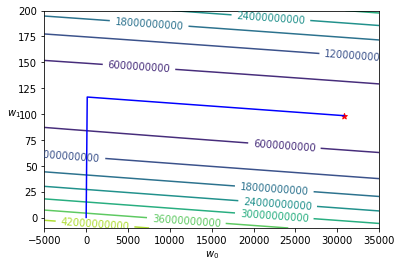

In [39]:
w_history = h._w_history
plot_contour(X_train, y_train, w_history, -5000, 35000, -10, 200, lr.intercept_, lr.coef_[0])

## 總結數值預測任務

- 面對屬於連續型的數值目標向量 $y$，讓電腦程式透過觀察訓練資料 $X^{(train)}$ 與 $y^{(train)}$，基於最小化 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 之間的損失 $J(w)$，透過正規方程或者梯度遞減的演算方法，尋找出係數向量 $w^*$ 建構出一個 $h(X; w^*)$ 去近似假設存在能完美對應 $X$ 和 $y$ 的 $f$。
- 實際採用梯度遞減進行最適化時，通常會將標準化與進階演算手法兩者搭配運作。